In [19]:
'''
Patrick Ballou
ID: 801130521
ECGR 4105
Homework 1
Problem 1
'''

'\nPatrick Ballou\nID: 801130521\nECGR 4105\nHomework 1\nProblem 1\n'

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [21]:
#create pandas dataframe and print first 5 rows
df = pd.read_csv("Housing.csv")
df_copy = df.copy() #copy will help later on
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [22]:
#categorical inputs that need to be mapped to numbers
non_num_varlist = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

In [23]:
#mapping function
def to_num(x):
    return x.map({"yes": 1, "no": 0})

In [24]:
#map inputs and output new dataframe
df[non_num_varlist] = df_copy[non_num_varlist].apply(to_num) #copy df is to avoid problems if you run cell again
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [25]:
#train/test split, random_state functions as seed
df_train, df_test = train_test_split(df, train_size=.8, test_size=.2, random_state=7)
#print(df_test.shape, df_test)

In [26]:
#create arrays of relevent inputs for this problem
vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
train_set = df_train[vars]
test_set = df_test[vars]

In [27]:
#create variables for test and train set since they are different sizes
m_train = len(train_set)
Y_train = train_set['price']
x_train = train_set[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
x_0_train = np.ones((m_train,1))
X_train = np.hstack((x_0_train, x_train))

m_test = len(test_set)
Y_test = test_set['price']
x_test = test_set[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
x_0_test = np.ones((m_test,1))
X_test = np.hstack((x_0_test, x_test))

In [28]:
#loss function
def compute_cost(X, y, theta, m):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = (1/(2*m))*np.sum(sqrErrors)
    
    return J

In [29]:
#gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    train_cost_history = np.zeros(iterations)
    test_cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha/m_train) * X.transpose().dot(errors)
        theta -= sum_delta
        train_cost_history[i] = compute_cost(X_train, Y_train, theta, m_train)
        test_cost_history[i] = compute_cost(X_test, Y_test, theta, m_test)
    
    return theta, train_cost_history, test_cost_history

In [30]:
#initialize theta, # of iterations, and learning rate
theta = np.zeros(6)
iterations = 500
alpha = .0000000008

In [31]:
#calculate cost for and output last value which should be the lowest
theta, train_cost_history, test_cost_history = gradient_descent(X_train, Y_train, theta, alpha, iterations)
print("Final theta values for a:", theta)

Final theta values for a: [2.81170732e-01 8.62664758e+02 9.59994940e-01 4.98151207e-01
 7.31669880e-01 2.25283212e-01]


Training cost: 1606218857447.2139
Testing cost: 1945798550544.899


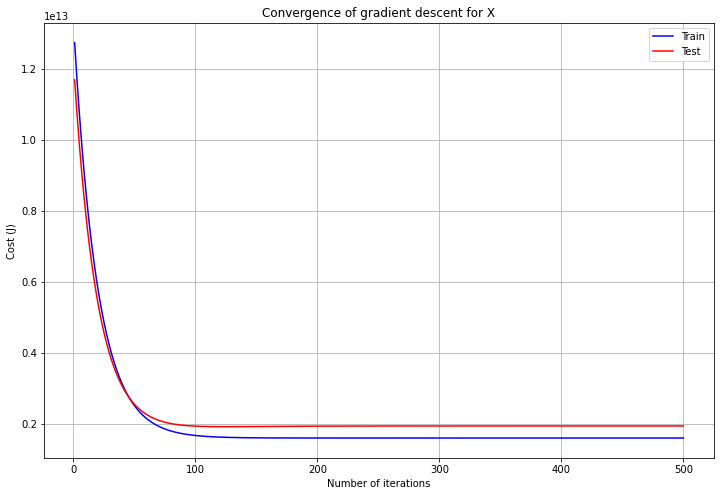

In [32]:
#plot loss vs iterations
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(range(1, iterations + 1), train_cost_history, color='blue', label='Train')
plt.plot(range(1, iterations + 1), test_cost_history, color='red', label='Test')
plt.grid()
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X')
print("Training cost:", train_cost_history[-1])
print("Testing cost:", test_cost_history[-1])

In [33]:
#Problem 1, part b

vars_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
train_set_b = df_train[vars_b]
test_set_b = df_test[vars_b]


m_train_b = len(train_set_b)
Y_train_b = train_set_b['price']
x_train_b = train_set_b[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
x_0_train_b = np.ones((m_train_b,1))
X_train_b = np.hstack((x_0_train_b, x_train_b))



m_test_b = len(test_set_b)
Y_test_b = test_set_b['price']
x_test_b = test_set_b[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
x_0_test_b = np.ones((m_test_b,1))
X_test_b = np.hstack((x_0_test_b, x_test_b))


theta_b = np.zeros(12)
iterations_b = 1600
alpha_b = .00000000008

In [34]:
def gradient_descent_b(X, y, theta, alpha, iterations):
    train_cost_history_b = np.zeros(iterations)
    test_cost_history_b = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha/m_train_b) * X.transpose().dot(errors)
        theta -= sum_delta
        train_cost_history_b[i] = compute_cost(X_train_b, Y_train_b, theta, m_train_b)
        test_cost_history_b[i] = compute_cost(X_test_b, Y_test_b, theta, m_test_b)
    
    return theta, train_cost_history_b, test_cost_history_b

In [35]:
theta_b, train_cost_history_b, test_cost_history_b = gradient_descent_b(X_train_b, Y_train_b, theta_b, alpha_b, iterations_b)
print("Final theta values for b:", theta_b)

Final theta values for b: [1.83771555e-01 8.47434304e+02 5.92684905e-01 2.86125412e-01
 4.08845161e-01 1.63502258e-01 4.61198289e-02 8.46955114e-02
 1.26615860e-02 9.15896184e-02 1.51317265e-01 5.64301558e-02]


Training cost: 1609874128863.5178
Testing cost: 1932751287084.6775


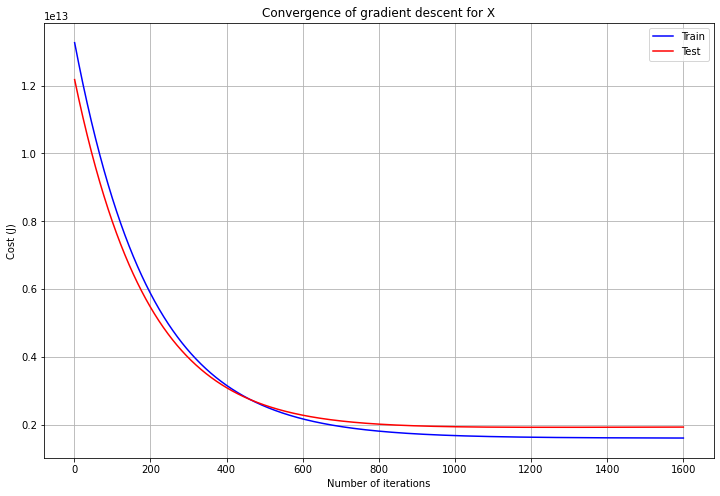

In [36]:
plt.plot(range(1, iterations_b + 1), train_cost_history_b, color='blue', label='Train')
plt.plot(range(1, iterations_b + 1), test_cost_history_b, color='red', label='Test')
plt.grid()
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X')
print("Training cost:", train_cost_history_b[-1])
print("Testing cost:", test_cost_history_b[-1])